# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.sample(5)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
43330,audi,a4,kombi,automatik,diesel,nein,131,150000,139,6200
226419,opel,zafira,bus,manuell,benzin,nein,143,150000,126,4800
237111,ford,mondeo,limousine,manuell,benzin,nein,125,90000,120,4800
215181,chevrolet,andere,limousine,manuell,diesel,nein,150,150000,101,5490
99619,volkswagen,scirocco,coupe,manuell,diesel,nein,140,125000,64,15500


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
len(data[data['price']<40000])

239261

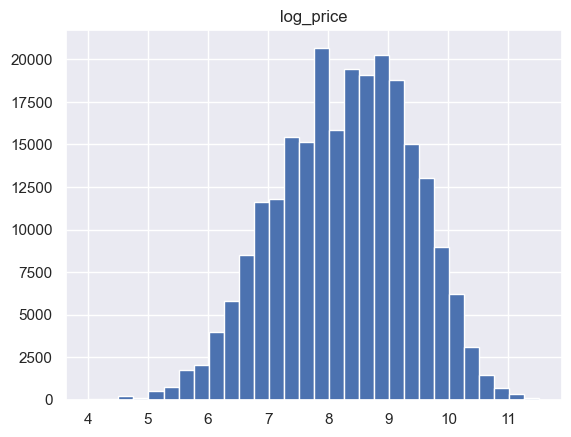

In [11]:
arr = data.copy()
arr['log_price'] = np.log(arr['price'])
arr = arr.loc[arr['log_price'] >= 4]
arr.hist('log_price', bins=30)
plt.show()

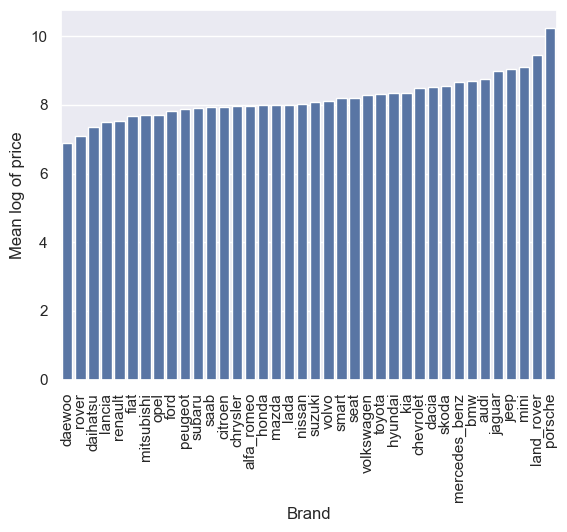

In [12]:
bran = arr.groupby('brand')['log_price'].mean().reset_index(name='mean_brand')
bran = bran.sort_values('mean_brand')
sns.barplot(data=bran, x='brand', y='mean_brand')
plt.xlabel('Brand')
plt.ylabel('Mean log of price')
plt.xticks(rotation=90) 
plt.show()

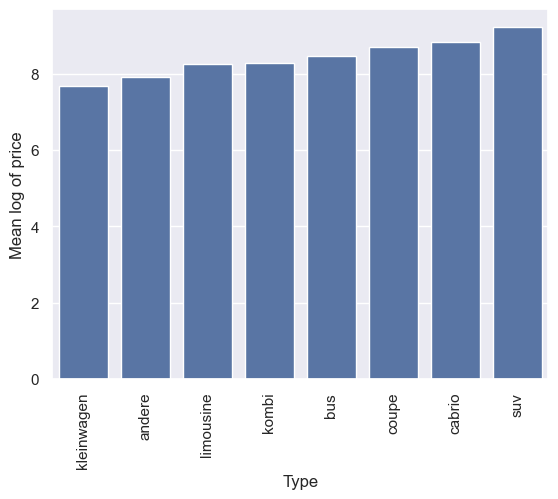

In [13]:
type = arr.groupby('vehicleType')['log_price'].mean().reset_index(name='mean_type')
type = type.sort_values('mean_type')
sns.barplot(data=type, x='vehicleType', y='mean_type')
plt.xlabel('Type')
plt.ylabel('Mean log of price')
plt.xticks(rotation=90) 
plt.show()

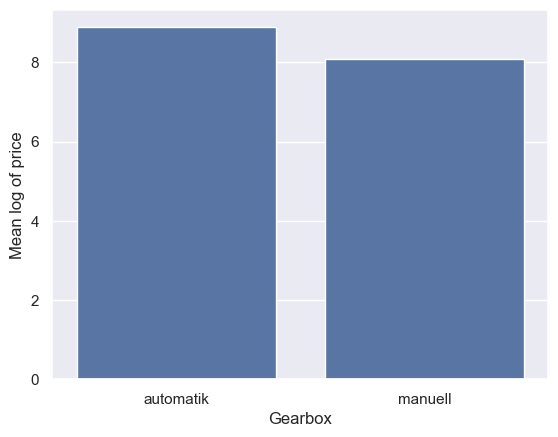

In [14]:
gear = arr.groupby('gearbox')['log_price'].mean().reset_index(name='mean_gear')
sns.barplot(data=gear, x='gearbox', y='mean_gear')
plt.xlabel('Gearbox')
plt.ylabel('Mean log of price')
plt.show()

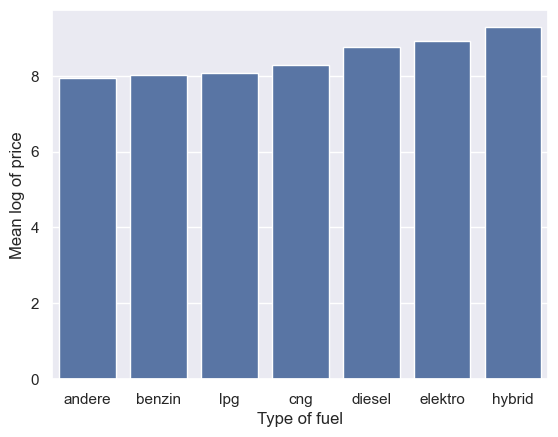

In [15]:
fuel = arr.groupby('fuelType')['log_price'].mean().reset_index(name='mean_fuel')
fuel = fuel.sort_values('mean_fuel')
sns.barplot(data=fuel, x='fuelType', y='mean_fuel')
plt.xlabel('Type of fuel')
plt.ylabel('Mean log of price')
plt.show()

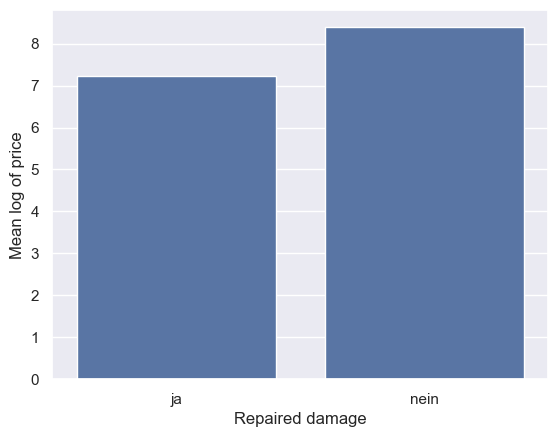

In [16]:
dam = arr.groupby('notRepairedDamage')['log_price'].mean().reset_index(name='mean_dam')
dam = dam.sort_values('mean_dam')
sns.barplot(data=dam, x='notRepairedDamage', y='mean_dam')
plt.xlabel('Repaired damage')
plt.ylabel('Mean log of price')
plt.show()

C:\Users\BOSS\AppData\Local\Temp\ipykernel_8464\232362078.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pow = brr.groupby('power_range')['log_price'].mean().reset_index(name='mean_pow')


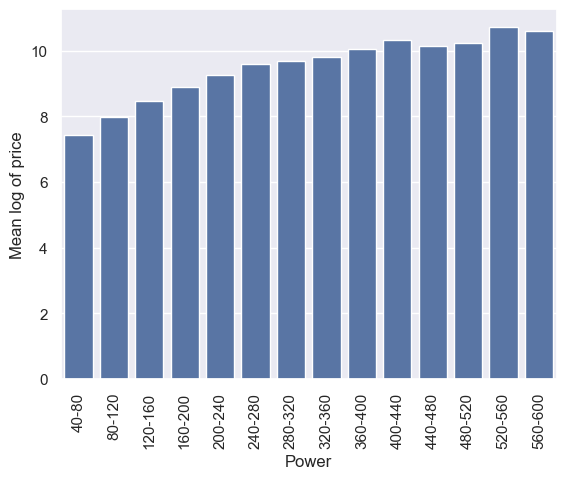

In [17]:
bins = range(40, int(arr['powerPS'].max()) + 40, 40)  # диапазоны по 40 л.с.
labels = [f'{i}-{i+40}' for i in range(40, int(arr['powerPS'].max()), 40)]
brr = arr.copy()

# Добавляем колонку с диапазоном
brr['power_range'] = pd.cut(brr['powerPS'], bins=bins, labels=labels)

# Группируем по диапазонам
pow = brr.groupby('power_range')['log_price'].mean().reset_index(name='mean_pow')

sns.barplot(data=pow, x='power_range', y='mean_pow')
plt.xlabel('Power')
plt.ylabel('Mean log of price')
plt.xticks(rotation=90) 
plt.show()

C:\Users\BOSS\AppData\Local\Temp\ipykernel_8464\1441313837.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kilo = brr.groupby('kilo_range')['log_price'].mean().reset_index(name='mean_pow')


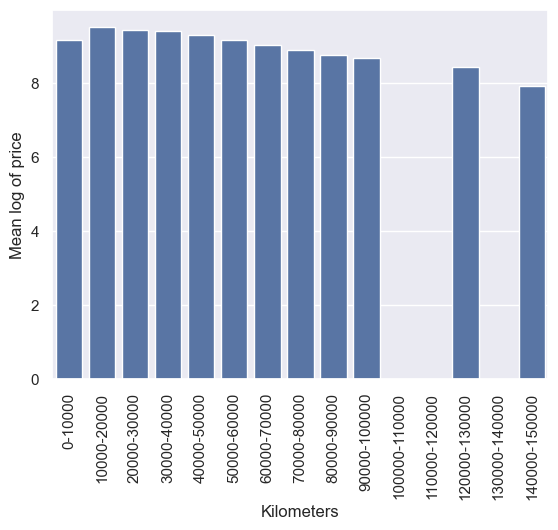

In [18]:
bins = range(0, int(arr['kilometer'].max()) + 10000, 10000) 
labels = [f'{i}-{i+10000}' for i in range(0, int(arr['kilometer'].max()), 10000)]
brr = arr.copy()

# Добавляем колонку с диапазоном
brr['kilo_range'] = pd.cut(brr['kilometer'], bins=bins, labels=labels)

# Группируем по диапазонам
kilo = brr.groupby('kilo_range')['log_price'].mean().reset_index(name='mean_pow')

sns.barplot(data=kilo, x='kilo_range', y='mean_pow')
plt.xlabel('Kilometers')
plt.ylabel('Mean log of price')
plt.xticks(rotation=90) 
plt.show()

C:\Users\BOSS\AppData\Local\Temp\ipykernel_8464\804708075.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age = brr.groupby('age_range')['log_price'].mean().reset_index(name='mean_pow')


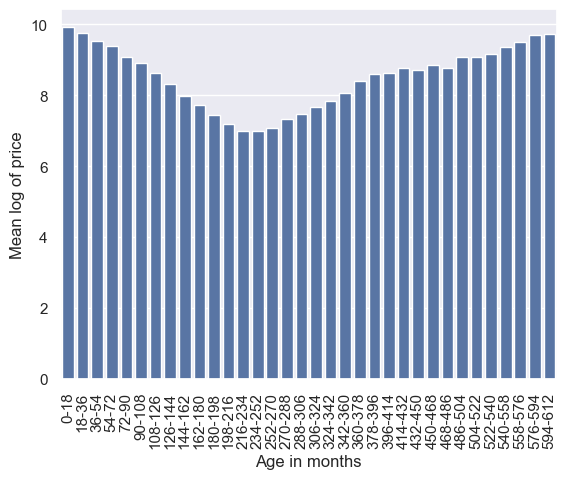

In [19]:
bins = range(0, int(arr['autoAgeMonths'].max()) + 18, 18) 
labels = [f'{i}-{i+18}' for i in range(0, int(arr['autoAgeMonths'].max()), 18)]
brr = arr.copy()

# Добавляем колонку с диапазоном
brr['age_range'] = pd.cut(brr['autoAgeMonths'], bins=bins, labels=labels)

# Группируем по диапазонам
age = brr.groupby('age_range')['log_price'].mean().reset_index(name='mean_pow')

sns.barplot(data=age, x='age_range', y='mean_pow')
plt.xlabel('Age in months')
plt.ylabel('Mean log of price')
plt.xticks(rotation=90) 
plt.show()

In [20]:
bins1 = range(0, int(arr['autoAgeMonths'].max()) + 18, 18) 
labels = [f'{i}-{i+18}' for i in range(0, int(arr['autoAgeMonths'].max()), 18)]
arr['age_range'] = pd.cut(arr['autoAgeMonths'], bins=bins1, labels=labels)

bins2 = range(0, int(arr['kilometer'].max()) + 10000, 10000)
labels = [f'{i}-{i+10000}' for i in range(0, int(arr['kilometer'].max()), 10000)]
arr['kilo_range'] = pd.cut(brr['kilometer'], bins=bins2, labels=labels)

bins3 = range(40, int(arr['powerPS'].max()) + 40, 40)  # диапазоны по 40 л.с.
labels = [f'{i}-{i+40}' for i in range(40, int(arr['powerPS'].max()), 40)]
arr['power_range'] = pd.cut(brr['powerPS'], bins=bins3, labels=labels)

In [21]:
arr.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,age_range,kilo_range,power_range
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220,162-180,140000-150000,40-80
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689,90-108,80000-90000,40-80
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972,234-252,140000-150000,80-120
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213,126-144,140000-150000,80-120
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902,126-144,140000-150000,80-120


In [22]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'power_range', 'age_range', 'kilo_range']

In [23]:
arr['bias'] = 1

x = arr[categorical]
y = arr['log_price']

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
])

x = column_transformer.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.8, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, shuffle=True)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [26]:
from linear_regression import LinearRegression
from sklearn.metrics import mean_squared_error

mse = mean_squared_error
optim = {
    'descent_name': 'stochastic',
    'regularized': False,
    'kwargs': {'lambda_': 1e-1, 'dimension': 366}
}
model = LinearRegression(optim)
model.fit(X_train, y_train.values.ravel())
err = mse(y_valid, model.predict(X_valid))
err

1.1174290843899275

Спуск: full, lambda = 1.023292992280754, MSE = 0.3057051928471096
Спуск: stochastic, lambda = 0.6704457411446323, MSE = 0.2913976892439652
Спуск: momentum, lambda = 1.023292992280754, MSE = 0.1937353594799986
Спуск: adam, lambda = 0.9098921097193962, MSE = 0.1800325220020554


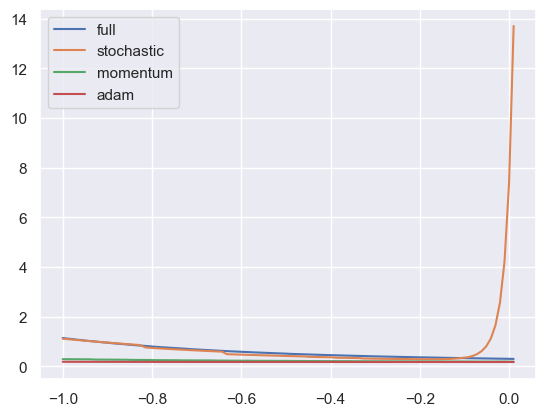

In [27]:
col = 100
names = ['full', 'stochastic', 'momentum', 'adam']
space = np.logspace(-1, 0.01, col)
for name in names:
    error = []
    for i in range(col):
        optim = {
        'descent_name': name,
        'regularized': False,
        'kwargs': {'lambda_': space[i], 'dimension': 366}
                }
        model = LinearRegression(optim)
        model.fit(X_train, y_train.values.ravel())
        err = mse(y_valid, model.predict(X_valid))
        error.append(err)
    plt.plot(np.log10(space), error, label=name)
    print(rf'Спуск: {name}, lambda = {space[np.argmin(error)]}, MSE = {np.min(error)}')
plt.legend()
plt.show()

In [28]:
const = arr['log_price'].mean()
Const = np.full(y_valid.shape[0], const)
err2 = mse(y_valid, Const)
err2

1.260653755866773

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

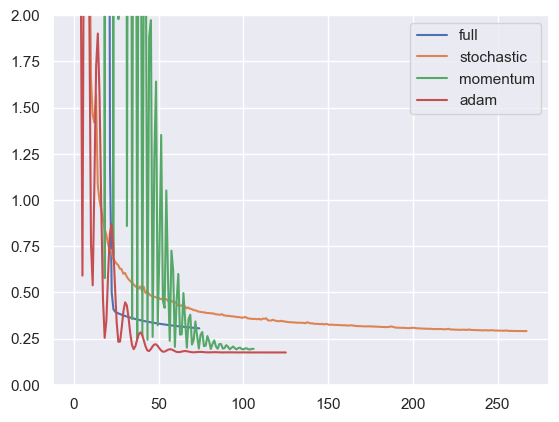

In [29]:
plt.show()
lams = [1.023292992280754, 0.6863816376269625, 0.9763284833912517, 1.023292992280754]

for i in range(4):
    optim = {
    'descent_name': names[i],
    'regularized': False,
    'kwargs': {'lambda_': lams[i], 'dimension': 366}
            }
    model = LinearRegression(optim)
    model.fit(X_train, y_train.values.ravel())
    loss = model.loss_history
    num = np.linspace(1, np.array(loss).shape[0] + 1, np.array(loss).shape[0])
    plt.plot(num, np.array(loss), label=names[i])
plt.ylim([0, 2])
plt.legend()
plt.show()

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

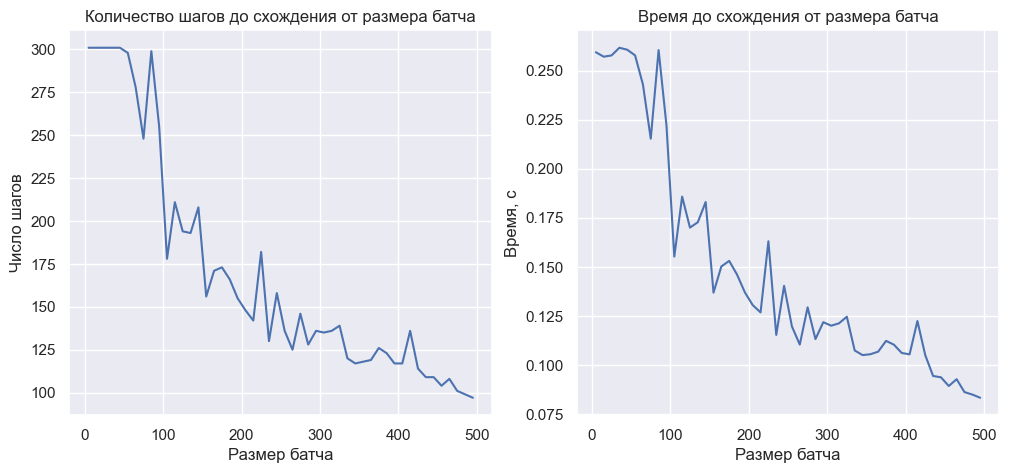

In [30]:
import time
batch_sizes = np.arange(5, 500, 10)
step = []
tim = []

for k in range(len(batch_sizes)):
    optim = {
    'descent_name': 'stochastic',
    'regularized': False,
    'kwargs': {'lambda_': 0.6863, 'dimension': 366, 'batch_size': batch_sizes[k]}
            }
    model = LinearRegression(optim)
    
    start = time.time()
    model.fit(X_train, y_train.values.ravel())
    end = time.time()
    
    step.append(np.array(model.loss_history).shape[0])
    tim.append(end - start)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(batch_sizes, step)
ax1.set_title('Количество шагов до схождения от размера батча')
ax1.set_xlabel('Размер батча')
ax1.set_ylabel('Число шагов')

ax2.plot(batch_sizes, tim)
ax2.set_title('Время до схождения от размера батча')
ax2.set_xlabel('Размер батча')
ax2.set_ylabel('Время, с')

plt.show()

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [52]:
mm = np.logspace(-2, 0, 15)
ll = np.logspace(-2, 0.1, 15)

for name in names:
    best = np.inf
    for lamb in ll:
        for mu in mm:
            optim = {
            'descent_name': name,
            'regularized': True,
            'kwargs': {'lambda_': lamb, 'dimension': 366, 'mu': mu}
                    }
            model = LinearRegression(optim)
            model.fit(X_train, y_train.values.ravel())
            pred = model.predict(X_valid)
            err = mse(y_valid, pred)
            if best > err:
                best = err
                bl = lamb
                bm = mu
    print(f"Модель: {name},  mu = {bm}, lambda = {bl}, MSE = {best}")

Модель: full,  mu = 0.013894954943731374, lambda = 1.2589254117941673, MSE = 0.2619908397553585
Модель: stochastic,  mu = 0.01, lambda = 0.630957344480193, MSE = 0.29186168595421386
Модель: momentum,  mu = 0.01, lambda = 0.8912509381337455, MSE = 0.21336807640292083
Модель: adam,  mu = 0.01, lambda = 1.2589254117941673, MSE = 0.2236414826398303


`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [59]:
ll = np.logspace(-2, 0.1, 15)

for name in names:
    best = np.inf
    for lamb in ll:
            optim = {
            'descent_name': name,
            'regularized': False,
            'loss_function': 'LossFunction.LogCosh',
            'kwargs': {'lambda_': lamb, 'dimension': 366}
                    }
            model = LinearRegression(optim)
            model.fit(X_train, y_train.values.ravel())
            pred = model.predict(X_valid)
            err = mse(y_valid, pred)
            if best > err:
                best = err
                bl = lamb
    print(f"Модель: {name}, lambda = {bl}, MSE = {best}")

Модель: full, lambda = 1.2589254117941673, MSE = 0.28436140748528294
Модель: stochastic, lambda = 0.630957344480193, MSE = 0.29265394719562937
Модель: momentum, lambda = 0.8912509381337455, MSE = 0.196283079889189
Модель: adam, lambda = 0.8912509381337455, MSE = 0.18003504719775965


### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`